# Week 3 - Using statistics to summarise datasets

This is a Jupyter notebook to explore the material in (Ross, 2017, Chp. 3) with the use of Python. 



In [1]:
%matplotlib inline
# from now on we'll start each notebook with the library imports
# and special commands to keep these things in one place (which
# is good practice). The line above is jupyter command to get 
# matplotlib to plot inline (between cells)
# Next we import the libraries and give them short names
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter

## Some data-sets

We will be making use of a number of datasets in this notebook, and so we define them here to make them accessible throughout.

In [2]:


# for illustrative purposes we have removed or added some the values from some of the datasets
# below compared to the original versions in (Ross, 2017)
# anonymous values based on those from (Ross, 2017, p. 86, Q8)
anon_data = np.array([75, 55, 21, 46, 98, 103, 88, 35, 22, 29, 73, 37, 121, 144, 133,
    52, 54, 63, 21, 7])
# some values from (Ross, 2017, Ex. 3.11)
league_bowling_scores = np.array([122, 126, 133, 140, 145, 145, 149, 150, 157, 162, 166,
    175, 177, 177, 183, 188, 199, 212])
# some ages at death as given in obituaries of the New York Times August 1, 2013 as
# presented in (Ross, 2017, p. 86, Q0)
obituary_data = [92, 90, 92, 74, 74, 69, 80, 94, 98, 65, 96, 84, 69, 86, 91, 88, 74,
    97, 85, 88, 68, 77, 94, 88, 65, 76, 75, 60, 69, 97, 92, 85, 70, 80, 93, 91,
    68, 82, 78, 89]


# From (Ross, 2017, p. 82) explanation for 90th percentile
example1_data = np.arange(1,13)
example2_data = np.arange(1,21)
# The above datasets are constructed so that the values equal the index
# e.g. [v1, v2,...] = [1, 2, ...]
# In particular, they are to check that the 90th percentile is as calculated on p. 82

# for ease of reference we'll put each dataset in a dictionary
datasets = dict([
    ("Anonymous", anon_data), ("League Bowling", league_bowling_scores),
    ("Obituary", obituary_data), ("Example 1", example1_data),
    ("Example 2", example2_data)])

## Exercise: Mean

The mean is probably the most widely used and understood form of averaging. We can average any collection with the following function:


In [3]:
def calc_mean_first_attempt(data):
    n = len(data)
    tot = 0
    for x in data:
        tot += x
    return tot/n
        


we can simplify this if we allow ourselves to use <code>numpy.array</code> objects.

In [4]:
def calc_mean(data):
    data = np.array(data)
    return np.sum(data)/data.size

In fact we can just use the library function <code>numpy.mean</code>.
`
All the above methods are applied to some of our data-sets defined at the beginning of the notebook. <code>numpy.sum</code> and <code>numpy.mean</code> are both described as "reductions" in the Numpy documentation. There is an informative explanation [here](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions).

In [5]:
for name in ["Anonymous", "League Bowling", "Obituary"]:
    data = datasets[name]
    print(f"Means for {name} Data:")
    print(f"\tcalc_mean_first_attempt(data) = {calc_mean_first_attempt(data)}")
    print(f"\tcalc_mean(data) = {calc_mean(data)}")
    print(f"\tnp.mean(data) = {np.mean(data)}")
    print("") # newline
    
    

Means for Anonymous Data:
	calc_mean_first_attempt(data) = 63.85
	calc_mean(data) = 63.85
	np.mean(data) = 63.85

Means for League Bowling Data:
	calc_mean_first_attempt(data) = 161.44444444444446
	calc_mean(data) = 161.44444444444446
	np.mean(data) = 161.44444444444446

Means for Obituary Data:
	calc_mean_first_attempt(data) = 82.075
	calc_mean(data) = 82.075
	np.mean(data) = 82.075



### Means from frequency tables

Below is the frequency count data for the severity of motorcyle accidents from (Weiss, 1992) as reported in (Ross, 2017, p. 70). Note that there are three variables, one list of severity types, one list of frequencies of accidents with helmets and one set of frequencies without helmets.

Write a function <code>calc_mean_from_frequencies</code> that takes two inputs: values and frequency counts, and produces a mean based on this. Then apply this to the data to give two sample means. There is more than one way to do this, but you might want to consider calculating the weights first then performing a weighted average with elementwise multiplication and then summing the terms using <code>np.sum</code>. You can read up on elementwise operations [here](https://scipy-lectures.org/intro/numpy/operations.html#elementwise-operations). As mentioned before, <code>numpy.sum</code> is what is described as a reduction, and you can read up more about reductions [here](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions).

In [6]:
severities = np.arange(7)
with_helmet = np.array([248, 58, 11, 3, 2, 8, 1])
without_helmet = np.array([227, 135, 33, 14, 3, 21, 6])

## to complete
def calc_mean_from_frequencies(values,  counts):
    total_count = np.sum(counts)
    # a vector of weights
    weights = counts/total_count
    # the mean is then just the sum of the elementwise
    # multiplication between weights and values
    mean = np.sum(weights*values)
    return mean

mean_with_helmet = calc_mean_from_frequencies(
    severities,  with_helmet)
mean_without_helmet = calc_mean_from_frequencies(
    severities,  without_helmet)
print(f"mean_with_helmet = {mean_with_helmet}")
print(f"mean_without_helmet = {mean_without_helmet}")

mean_with_helmet = 0.4320241691842901
mean_without_helmet = 0.9020501138952164


## Exercise: Median and Mode

Now try writing functions for the mean and the mode too, first from raw observations and then from frequency count data. You can use any functions from the <code>numpy</code> library you like, except for <code>numpy.median</code>. Compare your results for the median with <code>numpy.median</code> on the data-sets you have already seen.


In [7]:
## Median functions
## to complete
def calc_median(observations):
    """
    Calculates the median value from a sequence of observations
    
    Parameters:
    -----------
    observations : 1d numpy array
        sequence of observations
        
    Returns:
    --------
    median : number
    """
    sorted_obs = np.sort(observations)
    n = sorted_obs.size
    # odd number of observations
    if n % 2 == 1:
        # as in slides except we subtract 1 as python
        # counts indices from 0 (not 1) 
        i = int((n+1)/2) - 1
        return sorted_obs[i]
    else: # even length datasets
        # as in slides except we subtract 1 as python
        # counts indices from 0 (not 1) 
        i = int(n/2) - 1
        return (sorted_obs[i] + sorted_obs[i+1])/2

def calc_median_from_frequencies(values, counts):
    # This may not be the most computationally efficient way to
    # write this function but it is the easiest for me to write
    # first; I construct a set of observations from the 
    # frequency counts
    # start with empty list
    observations = []
    for value, count in zip(values, counts):
        # for each value, count pair extend the
        # list of observations to include <count> more observations
        # all with value <value>
        observations.extend([value]*count)
    # now reuse my previous function
    median = calc_median(observations)
    return median

In [8]:
## Mode functions
## to complete
# it is easier to do the frequencies function first for mode
def calc_mode_from_frequencies(values, counts):
    # make sure inputs are numpy arrays
    values = np.array(values)
    counts = np.array(counts)
    # this produces a boolean vector of True and False values
    # are_max[i] is True if counts[i] == maximum value 
    are_max = (counts == np.max(counts))
    # the boolean vector are_max pulls out all elements 
    # values[i] where are_max[i] is True 
    max_values = values[are_max]
    if max_values.size == 1:
        # there is one unique mode
        return max_values[0]
    else:
        # there is no unique mode, so multiple values returned
        return np.sort(max_values)

# requires this import statement: from collections import Counter
# see imports at top of notebook
def calc_mode(observations):
    # Again we will reuse a previous functions to minimise effort
    # first we need the values and counts from observations.
    # we saw last week a number of ways to do this, but here I use
    # Counter from the standard collections library in Python
    # Any method that produces a pair (values, counts) would be fine
    obs_counts = Counter(observations)
    values = list(obs_counts.keys())
    counts = list(obs_counts.values())
    # now reuse the function above
    return calc_mode_from_frequencies(values, counts)

median = 84.5
mode = [69 74 88 92]


Text(0, 0.5, 'Frequency')

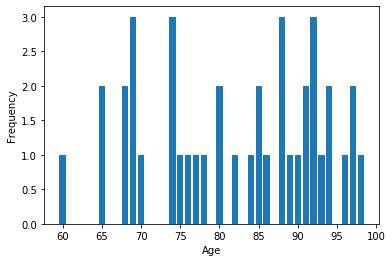

In [9]:
## Apply functions to obituary data
## to complete
# obituary data
median = calc_median(obituary_data)
mode = calc_mode(obituary_data)
print(f"median = {median}")
print(f"mode = {mode}")


# here I plot the obiturary data just for reference.
obs_counts = Counter(obituary_data)
# first convert values and counts to lists then to numpy arrays to avoid problems
values = np.array(list(obs_counts.keys()))
counts = np.array(list(obs_counts.values()))
# values and counts aren't sorted so we want to sort values numerically
# and sort counts so that they match the new ordering of values
# we can do this with the numpy.argsort function

# get a list of the indices that would order values numerically
reordering = np.argsort(values)
# order values numerically with this ordering
values = values[reordering]
# order counts in the same way
counts = counts[reordering]
# now plot the data
plt.bar(values, counts)
plt.xlabel("Age")
plt.ylabel("Frequency")

mean_with_helmet = 0.4320241691842901
median_with_helmet = 0
mode_with_helmet = 0
mean_without_helmet = 0.9020501138952164
median_without_helmet = 0
mode_without_helmet = 0


Text(0, 0.5, 'Frequency')

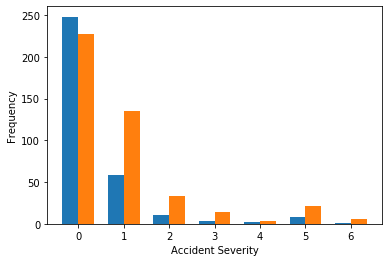

In [10]:
## apply functions to motorcycle accident severity data
## to complete
# motorcycle accident severity data
mean_with_helmet = calc_mean_from_frequencies(severities, with_helmet)
median_with_helmet = calc_median_from_frequencies(severities, with_helmet)
mode_with_helmet = calc_mode_from_frequencies(severities, with_helmet)
print(f"mean_with_helmet = {mean_with_helmet}")
print(f"median_with_helmet = {median_with_helmet}")
print(f"mode_with_helmet = {mode_with_helmet}")

mean_without_helmet = calc_mean_from_frequencies(severities, without_helmet)
median_without_helmet = calc_median_from_frequencies(severities, without_helmet)
mode_without_helmet = calc_mode_from_frequencies(severities, without_helmet)
print(f"mean_without_helmet = {mean_without_helmet}")
print(f"median_without_helmet = {median_without_helmet}")
print(f"mode_without_helmet = {mode_without_helmet}")

# now plot the data for reference
# below shows a neat way to plot a pair of bar charts
width = 0.35
plt.bar(severities-width/2, with_helmet, width)
plt.bar(severities+width/2, without_helmet, width)
plt.xlabel("Accident Severity")
plt.ylabel("Frequency")

In [22]:
mdata1 = [1,4,9,10,13,13,15,15,16,18,19]
print(calc_median(mdata1))

13


## Exercise: Sample 100p percentile
Here we can use one of two methods. The first we construct ourselves using the sorting functionality along with the ceil and floor functions. 

Below are three data-sets. For each find the 3rd percentile, the 45th percentile and the 90th percentile. To do this you will need to write a function that given a data-set and a value $0 < p < 1$ as arguments, calculates and returns the 100p percentile, then call this function on the three data-sets with each of the appropriate p values and output the results. 

In [23]:
## writing your own function to calculate sample 100p percentile
## to complete
def calc_sample_100p_percentile(data, p):
    # sort the data
    sorted_data = np.sort(data)
    # count the elements
    n = sorted_data.size
    # The calculations inthe slides are for indices counting
    # from 1, but Python indexes from 0, so we subtract 1
    index1 = int(np.floor(n*p))-1
    index2 = int(np.ceil(n*p))-1
    # if the indices are the same np must be an integer
    if index1 == index2:
        # the mean of the 2 values starting at index1
        return np.mean(sorted_data[index1:index1+2])
    # if the indices are different, return value at index 2
    return sorted_data[index2]

ps = [0.03, 0.45, 0.9]
print("Anonymous data")
for p in ps:
    value = calc_sample_100p_percentile(anon_data, p)
    print(f"\t100p percentile for p={p} is {value}")
                   
print("League bowling data")
for p in ps:
    value = calc_sample_100p_percentile(league_bowling_scores, p)
    print(f"\t100p percentile for p={p} is {value}")

print("Obituary data")
for p in ps:
    value = calc_sample_100p_percentile(obituary_data, p)
    print(f"\t100p percentile for p={p} is {value}")


Anonymous data
	100p percentile for p=0.03 is 7
	100p percentile for p=0.45 is 53.0
	100p percentile for p=0.9 is 127.0
League bowling data
	100p percentile for p=0.03 is 122
	100p percentile for p=0.45 is 157
	100p percentile for p=0.9 is 199
Obituary data
	100p percentile for p=0.03 is 65
	100p percentile for p=0.45 is 81.0
	100p percentile for p=0.9 is 95.0


The second approach to find the percentile values uses the library function <code>numpy.percentile</code>. However, the second method requires an appropriate choice for the <code>interpolation</code> input parameter. Look up the function's documentation and determine what values this can take. Now re-run this on the 3 data-sets from above and the two simple example datasets from below and check  which value for <code>interpolation</code> (if any) gives the same answers as your other function above.

In [24]:
## to complete
print("Ross' explanatory examples")
p = 0.9
for example_data in [example1_data, example2_data]:
    value = calc_sample_100p_percentile(example_data, p)
    midpoint = np.percentile(example_data, 100*p, interpolation='midpoint')
    low = np.percentile(example_data, 100*p, interpolation='lower')
    high = np.percentile(example_data, 100*p, interpolation='higher')
    nearest = np.percentile(example_data, 100*p, interpolation='nearest')
    print(f"\t100p percentile for p={p} is {value} ({low}-{midpoint}-{high})~{nearest}")


print("Anonymous data")
for p in ps:
    value = calc_sample_100p_percentile(anon_data, p)
    midpoint = np.percentile(anon_data, 100*p, interpolation='midpoint')
    low = np.percentile(anon_data, 100*p, interpolation='lower')
    high = np.percentile(anon_data, 100*p, interpolation='higher')
    nearest = np.percentile(anon_data, 100*p, interpolation='nearest')
    print(f"\t100p percentile for p={p} is {value} ({low}-{midpoint}-{high})~{nearest}")
                   
print("League bowling data")
for p in ps:
    value = calc_sample_100p_percentile(league_bowling_scores, p)
    midpoint = np.percentile(league_bowling_scores, 100*p, interpolation='midpoint')
    low = np.percentile(league_bowling_scores, 100*p, interpolation='lower')
    high = np.percentile(league_bowling_scores, 100*p, interpolation='higher')
    nearest = np.percentile(league_bowling_scores, 100*p, interpolation='nearest')
    print(f"\t100p percentile for p={p} is {value} ({low}-{midpoint}-{high})~{nearest}")

print("Obituary data")
for p in ps:
    value = calc_sample_100p_percentile(obituary_data, p)
    midpoint = np.percentile(obituary_data, 100*p, interpolation='midpoint')
    low = np.percentile(obituary_data, 100*p, interpolation='lower')
    high = np.percentile(obituary_data, 100*p, interpolation='higher')
    nearest = np.percentile(obituary_data, 100*p, interpolation='nearest')
    print(f"\t100p percentile for p={p} is {value} ({low}-{midpoint}-{high})~{nearest}")

# Note that there isn't one value for interpolation for which np.percentile
# agrees with our function above. This is, I think, due to a difference
# between how (Ross, 2017) defines percentiles and how they are defined
# for the numpy library. 
# Wikipedia gives a good overview of the common methods for percentiles
# see here: https://en.wikipedia.org/wiki/Percentile
# It would appear that (Ross, 2017) defines the nearest rank method but
# Numpy implements some of the linear-interpolation methods.

Ross' explanatory examples
	100p percentile for p=0.9 is 11 (10-10.5-11)~11
	100p percentile for p=0.9 is 18.5 (18-18.5-19)~18
Anonymous data
	100p percentile for p=0.03 is 7 (7-14.0-21)~21
	100p percentile for p=0.45 is 53.0 (52-53.0-54)~54
	100p percentile for p=0.9 is 127.0 (121-127.0-133)~121
League bowling data
	100p percentile for p=0.03 is 122 (122-124.0-126)~126
	100p percentile for p=0.45 is 157 (150-153.5-157)~157
	100p percentile for p=0.9 is 199 (188-193.5-199)~188
Obituary data
	100p percentile for p=0.03 is 65 (65-65.0-65)~65
	100p percentile for p=0.45 is 81.0 (80-81.0-82)~82
	100p percentile for p=0.9 is 95.0 (94-95.0-96)~94


## Exercise: Variance and Standard deviation
Again there are library functions from Numpy for these calculations, but before we use them, convince yourself that you understand the definitions by writing these in terms of more primitive functions. Think about calculating first the mean then the deviations of the data.

For this, you can use the existing Numpy functions <code>numpy.sum</code>, <code>numpy.mean</code>, <code>numpy.sqrt</code> and the elementwise arithmetic operations  <code>+</code>, <code>-</code>, <code>*</code>, <code>/</code> and <code>**</code> (to the power of). If you are unclear by what is meant by elementwise operations, then try reading [this](https://scipy-lectures.org/intro/numpy/operations.html#elementwise-operations) explanation.

Optional: If you fancy a bit more practice, try implementing the mean absolute deviation and the inter-quartile range too.

In [25]:
## write functions that calculate the variance and standard deviation of data
## to complete
def calc_variance(data):
    """
    Calculates the variance of some data
    
    Parameters:
    -----------
    data : 1d numpy array
        collection of numerical observations
        
    Returns:
    --------
    variance : float
        the variance of the data
    """
    # input data must be a numpy array
    n = data.size
    # mean - a single scalar mean of the data
    mean = np.mean(data)
    # deviations - a 1d array of deviations - x_i -\bar{x}
    deviations = data - mean
    # squared_deviations - a 1d array of squared deviations - (x_i -\bar{x})^2
    squared_deviations = deviations**2
    return np.sum(squared_deviations)/(n-1)

def calc_stdev(data):
    """
    Calculates the variance of some data
    
    Parameters:
    -----------
    data : 1d numpy array
        collection of numerical observations
        
    Returns:
    --------
    variance : float
        the variance of the data
    """
    # good programmers reuse existing functionality where possible
    variance = calc_variance(data)
    return np.sqrt(variance)

## optional 
def calc_mad(data):
    """
    Calculates the mean absolute deviation of some data
    
    Parameters:
    -----------
    data : 1d numpy array
        collection of numerical observations
        
    Returns:
    --------
    mad : float
        the mean absolute deviation of the data
    """
    n = data.size
    mean = np.mean(data)
    deviations = data - mean
    absolute_deviations = np.abs(deviations)
    return np.mean(absolute_deviations)


def calc_iqr(data):
    """
    Calculates the interquartile range of some data
    
    Parameters:
    -----------
    data : 1d numpy array
        collection of numerical observations
        
    Returns:
    --------
    mad : float
        the inter-quartile range of the data
    """
    lower = calc_sample_100p_percentile(data, 0.25)
    upper = calc_sample_100p_percentile(data, 0.75)
    return upper-lower




In [26]:
## Apply functions to obituary data
## to complete
# must make the data a numpy array
obituary_data = np.array(obituary_data)
variance = calc_variance(obituary_data)
stdev = calc_stdev(obituary_data)
print(f"variance = {variance}")
print(f"stdev = {stdev}")

# and compare with numpy

variance_np = np.var(obituary_data)
stdev_np = np.std(obituary_data)
print(f"Numpy: variance = {variance_np}")
print(f"Numpy: stdev = {stdev_np}")

## Note again a slight difference. Numpy by default divides by n rather
## than (n-1) in the variance calculation. We'll find out why (Ross, 2017)
## suggests the latter later in the module.
## if we recalculate the numpy values using ddof=1 (degrees of freedom equals 1)
## we recover our original values
variance_np = np.var(obituary_data, ddof=1)
stdev_np = np.std(obituary_data, ddof=1)
print(f"Numpy (ddof=1): variance = {variance_np}")
print(f"Numpy (ddof=1): stdev = {stdev_np}")

# optional
print("Optional functions. ")
mad = calc_mad(obituary_data)
iqr = calc_iqr(obituary_data)
print(f"mad = {mad}")
print(f"iqr = {iqr}")

# Remember that these measures are alternatives to the standard deviation
# for measures of variation that are in the same units as the original 
# data. mean-absolute deviation tends to be lower than standard deviation
# and inter-quartile range is larger. Nonetheless they all measure the
# variation in the data.


variance = 114.4301282051282
stdev = 10.697201886714497
Numpy: variance = 111.569375
Numpy: stdev = 10.562640531609508
Numpy (ddof=1): variance = 114.4301282051282
Numpy (ddof=1): stdev = 10.697201886714497
Optional functions. 
mad = 9.321250000000001
iqr = 17.5


Look at the following data-sets from (Ross, 2017, p. 96, Q2). Which of these data-sets would you say had the larger variance? Calculate the variance of each to check your answers.


In [31]:
q3data = np.array([3.71, 4.23, 4.16, 2.98, 3.23, 4.67, 3.99, 5.04, 4.55, 3.24, 2.80, 3.44, 3.27, 2.66, 2.95, 4.70, 5.12, 3.77, 3.12, 2.38, 4.57, 3.88, 2.97, 3.70, 2.53, 2.67, 4.12, 4.80, 3.55, 3.86, 2.51, 3.33, 3.85, 2.35, 3.12, 4.39, 5.09, 3.38, 2.73, 3.07])
ans = calc_iqr(q3data)
print(ans)

1.2200000000000002


In [15]:
dataA = [66, 68, 71, 72, 72, 75]
dataB = [ 2,  5,  9, 10, 10, 16]

## to complete
## at first glance the numbers in dataA are bigger and we might
# expect it to have a larger variance but in fact dataA has 
# a smaller variance. To see this we can try shifting dataA
# so that it has a similar range to dataB
# (using elementwise arithmetic)

# let's check this. FIrst we must convert to numpy arrays
dataA = np.array(dataA)
dataB = np.array(dataB)
meanA = calc_mean(dataA)
meanB = calc_mean(dataB)
print(f"dataA-62 = {dataA-62}")
print(f"dataB =    {dataB}")

varA = calc_variance(dataA)
varB = calc_variance(dataB)
print(f"varA = {varA}")
print(f"varB = {varB}")



dataA-62 = [ 4  6  9 10 10 13]
dataB =    [ 2  5  9 10 10 16]
varA = 10.266666666666666
varB = 23.066666666666666


### A box plot

There is a simple way to draw a box plot with matplotlib. See below:

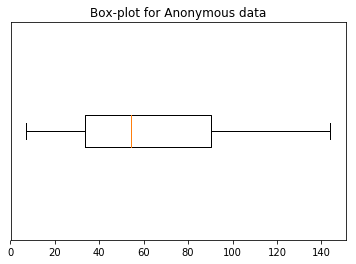

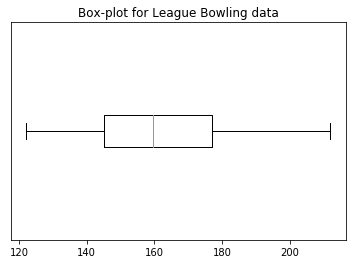

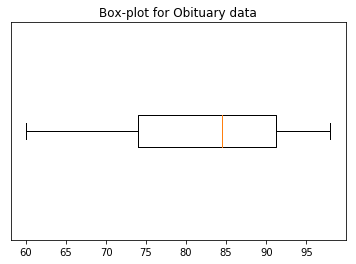

In [29]:
# A short snippet of code showing how to draw boxplots
for i,name in enumerate(["Anonymous", "League Bowling", "Obituary"]):
    plt.figure()
    data = datasets[name]
    # draw horizontal box-plots default is vertical
    plt.boxplot(data, vert=False)
    plt.yticks([])
    plt.title(f"Box-plot for {name} data")
    

## Exercise: Normal data and the empirical rule

The following data-sets represent the ages of participants in 3 different studies. Histogram these datasets given the bins provided and decide which (if any) are approximately normally distributed. Explain your reasons. 

Calculate the mean and standard deviation of each data-set. What can you now say about any of the data-sets? (Hint: consider the empirical rule).

Data-set 1 has mean = 28.294736842105262 and standard deviation 6.863900508741791
Data-set 2 has mean = 28.470175438596492 and standard deviation 7.081232049413601
Data-set 3 has mean = 28.137323943661972 and standard deviation 6.715455257657198
within1std = 0.684
within2std = 0.947
within3std = 0.996


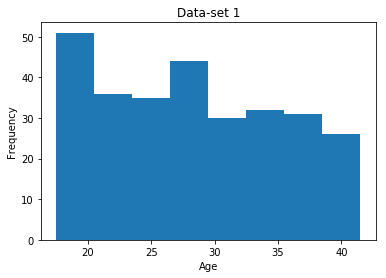

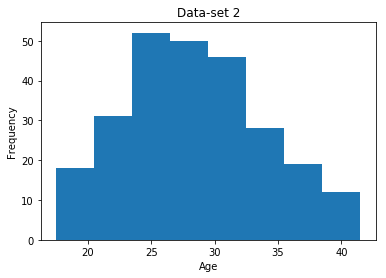

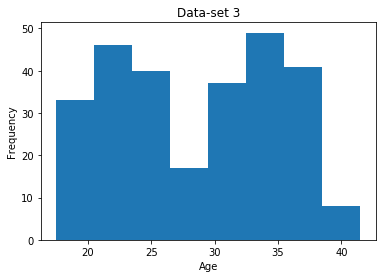

In [17]:
bins = np.linspace(17.5, 41.5, 9)

data1 = np.array([
    19, 34, 25, 34, 23, 20, 24, 31, 34, 34, 28, 27, 32, 39, 31, 19, 24, 21, 19,
    30, 37, 32, 20, 20, 35, 28, 28, 40, 20, 21, 18, 33, 35, 30, 40, 29, 31, 36,
    27, 21, 34, 38, 21, 29, 37, 27, 18, 35, 36, 40, 23, 25, 35, 19, 29, 20, 28,
    26, 30, 28, 19, 37, 37, 36, 40, 37, 19, 19, 40, 36, 22, 24, 38, 21, 40, 19,
    35, 18, 19, 22, 29, 25, 22, 18, 34, 20, 35, 34, 24, 22, 20, 30, 40, 32, 38,
    33, 26, 35, 22, 21, 26, 33, 25, 19, 39, 18, 18, 22, 24, 39, 38, 24, 30, 20,
    21, 23, 19, 23, 28, 20, 35, 25, 30, 22, 22, 27, 19, 26, 39, 18, 20, 19, 27,
    18, 30, 31, 28, 26, 27, 18, 22, 21, 34, 30, 20, 19, 38, 35, 24, 26, 21, 19,
    18, 35, 39, 35, 18, 37, 22, 19, 25, 33, 29, 40, 27, 38, 20, 25, 26, 27, 29,
    18, 37, 25, 19, 34, 39, 21, 32, 29, 23, 31, 36, 27, 32, 25, 29, 40, 28, 31,
    28, 31, 39, 39, 28, 21, 35, 29, 35, 37, 37, 21, 21, 37, 32, 25, 32, 36, 20,
    28, 32, 40, 24, 36, 28, 28, 29, 28, 39, 38, 28, 25, 39, 22, 33, 18, 32, 24,
    28, 27, 34, 22, 32, 29, 36, 23, 38, 34, 39, 19, 20, 18, 21, 36, 29, 40, 26,
    28, 24, 40, 25, 26, 35, 24, 20, 23, 25, 18, 19, 28, 30, 28, 37, 31, 26, 30,
    34, 29, 31, 40, 37, 24, 21, 27, 40, 23, 20, 19, 23, 37, 36, 31, 33, 29, 40
    ])

data2 = np.array([
    42, 25, 25, 19, 43, 27, 18, 24, 43, 12, 30, 24, 22, 32, 20, 29, 25, 23,
    16, 31, 29, 31, 33, 24, 32, 31, 34, 44, 34, 20, 27, 16, 32, 29, 26, 33,
    22, 36, 17, 37, 31, 31, 30, 21, 28, 29, 34, 43, 28, 30, 24, 42, 21, 27,
    31, 26, 39, 39, 30, 26, 21, 35, 28, 27, 22, 25, 25, 26, 30, 27, 12, 20,
    33, 21, 20, 18, 21, 34, 22, 29, 23, 15, 36, 25, 36, 31, 30, 33, 37, 28,
    31, 28, 38, 34, 31, 28, 25, 32, 23, 32, 35, 36, 27, 29, 25, 27, 27, 37,
    25, 24, 23, 26, 24, 30, 28, 34, 47, 30, 37, 39, 20, 29, 26, 27, 34, 26,
    31, 41, 24, 34, 25, 27, 42, 32, 27, 33, 21, 29, 21, 28, 33, 48, 31, 25,
    26, 23, 20, 28, 19, 37, 25, 21, 21, 43, 34, 39, 29, 41, 41, 13, 18, 40,
    32, 18, 27, 25, 30, 35, 20, 17, 23, 36, 35, 28, 28, 27, 23, 25, 28, 26,
    32, 30, 20, 33, 37, 42, 28, 33, 35, 22, 27, 19, 24, 28, 25, 12, 23, 25,
    31, 37, 42, 31, 29, 25, 46, 25, 40, 22, 21, 34, 29, 29, 22, 32, 29, 24,
    31, 19, 34, 26, 31, 38, 38, 30, 26, 25, 22, 16, 36, 29, 38, 29, 31,  9,
    25, 52, 27, 35, 31, 33, 36, 30, 25, 32, 26, 31, 26, 29, 25, 16, 30, 26,
    28, 25, 25, 15, 24, 27, 25, 24, 41, 36, 21, 41, 22, 26, 14, 31, 31, 24,
    30, 22, 30, 34, 21, 16, 22, 40, 34, 29, 20, 19, 30, 29, 28,])

data3 = np.array([
    33, 25, 36, 23, 36, 34, 33, 19, 24, 36, 33, 38, 31, 32, 33, 19, 22, 31, 35,
    34, 24, 36, 23, 36, 39, 25, 21, 38, 20, 22, 19, 25, 32, 18, 36, 30, 37, 32,
    37, 13, 34, 20, 33, 17, 20, 26, 43, 22, 17, 33, 37, 36, 40, 28, 32, 21, 26,
    30, 37, 39, 26, 26, 31, 22, 32, 35, 31, 34, 33, 20, 34, 21, 30, 25, 37, 22,
    22, 22, 19, 22, 25, 24, 22, 27, 23, 37, 32, 36, 22, 19, 31, 33, 19, 33, 24,
    23, 20, 23, 32, 21, 26, 20, 24, 35, 32, 36, 36, 20, 24, 19, 16, 35, 29, 31,
    20, 16, 34, 34, 34, 25, 35, 31, 33, 23, 17, 23, 27, 22, 28, 33, 21, 34, 20,
    34, 19, 27, 35, 34, 35, 25, 30, 26, 20, 33, 34, 37, 37, 36, 26, 27, 32, 36,
    22, 22, 25, 34, 16, 25, 36, 25, 36, 34, 18, 16, 21, 30, 33, 36, 34, 21, 22,
    29, 33, 32, 21, 23, 32, 35, 32, 33, 13, 30, 19, 31, 36, 36, 21, 19, 28, 21,
    33, 30, 25, 38, 36, 20, 33, 31, 24, 31, 32, 32, 23, 29, 29, 25, 21, 32, 17,
    26, 36, 23, 20, 34, 38, 24, 35, 25, 35, 26, 26, 22, 27, 19, 22, 22, 34, 21,
    23, 26, 27, 26, 40, 40, 38, 30, 37, 21, 37, 28, 17, 36, 37, 18, 23, 33, 20,
    33, 20, 32, 24, 20, 16, 23, 41, 28, 19, 39, 23, 26, 39, 22, 25, 35, 27, 21,
    30, 32, 19, 37, 27, 19, 18, 25, 26, 37, 31, 25, 33, 38, 37, 37, 24, 33])

## to complete
plt.figure()
plt.hist(data1, bins=bins)
plt.title("Data-set 1")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.figure()
plt.hist(data2, bins=bins)
plt.title("Data-set 2")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.figure()
plt.hist(data3, bins=bins)
plt.title("Data-set 3")
plt.xlabel('Age')
plt.ylabel('Frequency')

# here I have started to use the numpy libraries
# it is better practice to use standard libraries where possible
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)

std1 = np.std(data1)
std2 = np.std(data2)
std3 = np.std(data3)

print(f"Data-set 1 has mean = {mean1} and standard deviation {std1}")
print(f"Data-set 2 has mean = {mean2} and standard deviation {std2}")
print(f"Data-set 3 has mean = {mean3} and standard deviation {std3}")

# Data set 1 is not bell shaped, instead there is a skew/bias with
# more values at the lower end than the upper end
# Data set 2 appears roughly normal. It is approximately symmetric and
# bell shaped. We can check whether the empirical rule holds
# Data set 3 appears to have two "modes", this suggests a mixture 
# distribution.

# checking the empirical rule
# we count the number of data=points in data2 that lie between
# mean +/- 1, 2 and 3 standard deviations
# 1 standard deviation
lower = mean2 - std2
upper = mean2 + std2
# this is again using boolean vectors produced by elementwise comparisons < and >
# the & operator is an elementwise and operation
# the sum function counts the number of True elements in the resulting vector
within1std = np.sum((data2 > lower) & (data2 < upper))/data2.size
# 2 standard deviation
print(f"within1std = {within1std:.3f}")
lower = mean2 - 2*std2
upper = mean2 + 2*std2
within2std = np.sum((data2 > lower) & (data2 < upper))/data2.size
print(f"within2std = {within2std:.3f}")
# 3 standard deviation
lower = mean2 - 3*std2
upper = mean2 + 3*std2
within3std = np.sum((data2 > lower) & (data2 < upper))/data2.size
print(f"within3std = {within3std:.3f}")
# So approximately 68.4% of the data lies within 1 standard deviation of the mean (target 68%)
# approximately 94.7% of the data lies within 2 standard devition of the mean (target 95%)
# and approximately 99.6% of the data lies within 2 standard devition of the mean (target 99.7%)
# which very closely match the values of the empirical rule


## Exercise: Pearson's r
Pearson's product moment correlation coefficient sometimes just called the r-value or Pearson's r is defined in (Ross, 2017, Sec. 3.7). Your job is to write the function and then apply it to the smoking vs free radicals and school vs pulse-rate data-sets. Compare your answers with the library function <code>numpy.pearsonr</code>.

In [18]:
## write your own function to calculate r (Pearson's product moment correlation coefficient)
## to complete

def calc_r(xys):
    xs = xys[:,0]
    ys = xys[:,1]
    xmean = np.mean(xs)
    ymean = np.mean(ys)
    xdevs = xs - xmean
    ydevs = ys - ymean
    numer = np.sum(xdevs*ydevs)
    denom = np.sqrt(np.sum(xdevs**2)* np.sum(ydevs**2))
    return numer/denom
    

For smoking data:
r = 0.87596
scipy r = 0.87596


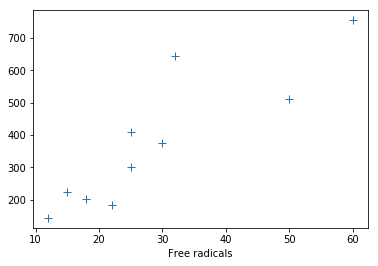

In [19]:
smoking_data = [
    (18,202), (32, 644), (25, 411), (60, 755), (12, 144),
    (25, 302), (50, 512), (15, 223), (22, 183), (30, 375)]

## calculate Pearson's r on the above data and report it
## plot the data too
# to complete 
smoking_data  = np.array(smoking_data)

plt.figure()
plt.plot(smoking_data[:,0], smoking_data[:,1], '+', ms=8)
plt.xlabel("Number of cigarettes smoked")
plt.ylabel("Free radicals")

r = calc_r(smoking_data)
print(f"For smoking data:\nr = {r:.5f}")

# scipy version
r, _ = stats.pearsonr(smoking_data[:,0], smoking_data[:,1])
print(f"scipy r = {r:.5f}")


For school_vs_pulse_rate:
r = -0.76380
scipy r = -0.76380


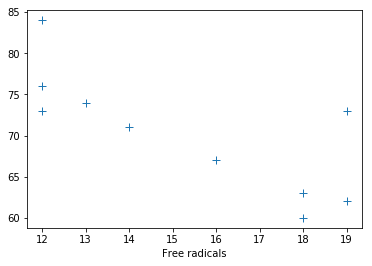

In [20]:
school_vs_pulse_rate = [
  (12, 73), (16, 67), (13, 74), (18, 63), (19, 73),
  (12, 84), (18, 60), (19, 62), (12, 76), (14, 71)]

## calculate Pearson's r on the above data and report it
## plot the data too
## to complete
school_vs_pulse_rate  = np.array(school_vs_pulse_rate)

plt.figure()
plt.plot(school_vs_pulse_rate[:,0], school_vs_pulse_rate[:,1], '+', ms=8)
plt.xlabel("Number of cigarettes smoked")
plt.xlabel("Free radicals")

r = calc_r(school_vs_pulse_rate)
print(f"For school_vs_pulse_rate:\nr = {r:.5f}")

# scipy version
r, _ = stats.pearsonr(school_vs_pulse_rate[:,0], school_vs_pulse_rate[:,1])
print(f"scipy r = {r:.5f}")
# in this case there are no differences between Numpy and the textbook values